In [1]:
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog()

mask = halocat.halo_table['halo_upid']==-1
mask *= halocat.halo_table['halo_mvir'] >= 10**11
host_halos = halocat.halo_table[mask]

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
from halotools.utils import sliding_conditional_percentile

x = host_halos['halo_mvir']
y = host_halos['halo_spin']
nwin = 501
host_halos['halo_spin_percentile'] = sliding_conditional_percentile(x, y, nwin)

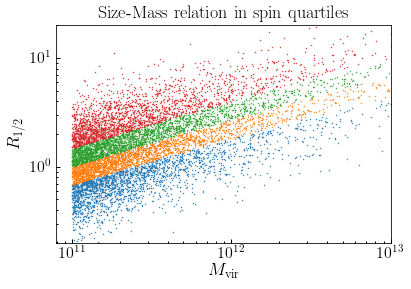

In [12]:
from halotools.empirical_models import polynomial_from_table
table_abscissa = [11, 13.5, 15]
table_ordinates = np.log10([1., 10., 30.])
input_abscissa = np.log10(x)
median_size = 10**polynomial_from_table(table_abscissa, table_ordinates, input_abscissa)

from scipy.stats import norm 

host_halos['disk_size'] = 10.**norm.isf(1. - host_halos['halo_spin_percentile'], 
                        loc=np.log10(median_size), scale=0.25)


low_spin_mask = host_halos['halo_spin_percentile'] < 0.25
low_mid_spin_mask = host_halos['halo_spin_percentile'] >= 0.25
low_mid_spin_mask *= host_halos['halo_spin_percentile'] < 0.5
high_mid_spin_mask = host_halos['halo_spin_percentile'] >= 0.5
high_mid_spin_mask *= host_halos['halo_spin_percentile'] < 0.75
high_spin_mask = host_halos['halo_spin_percentile'] > 0.75

fig, ax = plt.subplots(1, 1)

__=ax.loglog()
__=ax.loglog()

nskip = 50
__=ax.scatter(x[low_spin_mask][::nskip], 
              host_halos['disk_size'][low_spin_mask][::nskip], s=0.2)
__=ax.scatter(x[low_mid_spin_mask][::nskip], 
              host_halos['disk_size'][low_mid_spin_mask][::nskip], s=0.2)
__=ax.scatter(x[high_mid_spin_mask][::nskip], 
              host_halos['disk_size'][high_mid_spin_mask][::nskip], s=0.2)
__=ax.scatter(x[high_spin_mask][::nskip], 
              host_halos['disk_size'][high_spin_mask][::nskip], s=0.2)


xlim = ax.set_xlim(10**10.9, 10**13)
ylim = ax.set_ylim(0.2, 20)

xlabel = ax.set_xlabel(r'$M_{\rm vir}$')
ylabel = ax.set_ylabel(r'$R_{1/2}$')

title = ax.set_title(r'${\rm Size}$-${\rm Mass\ relation\ in\ spin\ quartiles}$')

figname = 'size_mass_spin.png'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

## Adding scatter in the correlation

In [13]:
uran = np.random.random(len(host_halos))
z = 0.5*uran + 0.5*host_halos['halo_spin_percentile']
noisy_spin_percentile = sliding_conditional_percentile(
    host_halos['halo_mvir'], z, nwin)
host_halos['disk_size2'] = 10.**norm.isf(1. - noisy_spin_percentile, 
                        loc=np.log10(median_size), scale=0.25)


In [14]:
from scipy.stats import binned_statistic
log_mvir_bins = np.linspace(11, 14.5, 20)
mvir_bins = 10**log_mvir_bins
mvir_mids = 10**(0.5*(log_mvir_bins[:-1]+log_mvir_bins[1:]))

stat='mean'
median_disk_size_low_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][low_spin_mask], 
    host_halos['disk_size'][low_spin_mask], bins=mvir_bins, statistic=stat)
median_disk_size_low_mid_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][low_mid_spin_mask], 
    host_halos['disk_size'][low_mid_spin_mask], bins=mvir_bins, statistic=stat)
median_disk_size_high_mid_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][high_mid_spin_mask], 
    host_halos['disk_size'][high_mid_spin_mask], bins=mvir_bins, statistic=stat)
median_disk_size_high_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][high_spin_mask], 
    host_halos['disk_size'][high_spin_mask], bins=mvir_bins, statistic=stat)

median_disk_size2_low_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][low_spin_mask], 
    host_halos['disk_size2'][low_spin_mask], bins=mvir_bins, statistic=stat)
median_disk_size2_low_mid_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][low_mid_spin_mask], 
    host_halos['disk_size2'][low_mid_spin_mask], bins=mvir_bins, statistic=stat)
median_disk_size2_high_mid_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][high_mid_spin_mask], 
    host_halos['disk_size2'][high_mid_spin_mask], bins=mvir_bins, statistic=stat)
median_disk_size2_high_spin, __, __ = binned_statistic(
    host_halos['halo_mvir'][high_spin_mask], 
    host_halos['disk_size2'][high_spin_mask], bins=mvir_bins, statistic=stat)




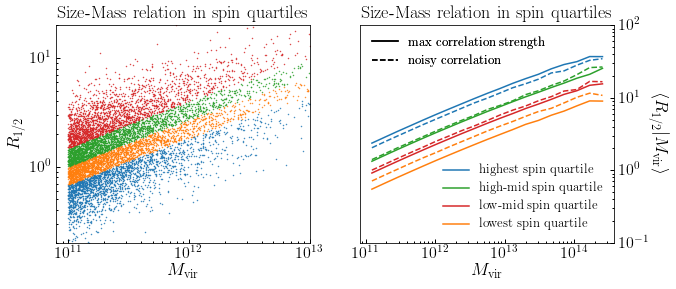

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

__=ax1.loglog()
__=ax1.loglog()

nskip = 50
__=ax1.scatter(x[low_spin_mask][::nskip], 
              host_halos['disk_size'][low_spin_mask][::nskip], s=0.2)
__=ax1.scatter(x[low_mid_spin_mask][::nskip], 
              host_halos['disk_size'][low_mid_spin_mask][::nskip], s=0.2)
__=ax1.scatter(x[high_mid_spin_mask][::nskip], 
              host_halos['disk_size'][high_mid_spin_mask][::nskip], s=0.2)
__=ax1.scatter(x[high_spin_mask][::nskip], 
              host_halos['disk_size'][high_spin_mask][::nskip], s=0.2)


xlim = ax1.set_xlim(10**10.9, 10**13)
ylim = ax1.set_ylim(0.2, 20)

xlabel = ax1.set_xlabel(r'$M_{\rm vir}$')
ylabel = ax1.set_ylabel(r'$R_{1/2}$')

title = ax1.set_title(r'${\rm Size}$-${\rm Mass\ relation\ in\ spin\ quartiles}$')


__=ax2.loglog()

high_spin_line=ax2.plot(mvir_mids, median_disk_size_high_spin, 
          label=r'${\rm highest\ spin\ quartile}$')
__=ax2.plot(mvir_mids, median_disk_size2_high_spin, 
           '--', color=high_spin_line[0]._color)

low_spin_line=ax2.plot(mvir_mids, median_disk_size_low_spin, 
          label=r'${\rm lowest\ spin\ quartile}$')
__=ax2.plot(mvir_mids, median_disk_size2_low_spin, 
           '--', color=low_spin_line[0]._color)

high_mid_spin_line=ax2.plot(mvir_mids, median_disk_size_high_mid_spin, 
          label=r'${\rm max2\ correlation\ strength}$')
__=ax2.plot(mvir_mids, median_disk_size2_high_mid_spin, 
           '--', color=high_mid_spin_line[0]._color)

low_mid_spin_line=ax2.plot(mvir_mids, median_disk_size_low_mid_spin)
__=ax2.plot(mvir_mids, median_disk_size2_low_mid_spin, 
           '--', color=low_mid_spin_line[0]._color, 
          label=r'${\rm noisy\ correlation}$')


from matplotlib import lines as mlines
low_spin_line = mlines.Line2D([], [], c=low_spin_line[0]._color, 
                               label=r'${\rm lowest\ spin\ quartile}$')
low_mid_spin_line = mlines.Line2D([], [], c=low_mid_spin_line[0]._color, 
                               label=r'${\rm low}$-${\rm mid\ spin\ quartile}$')
high_mid_spin_line = mlines.Line2D([], [], c=high_mid_spin_line[0]._color, 
                               label=r'${\rm high}$-${\rm mid\ spin\ quartile}$')
high_spin_line = mlines.Line2D([], [], c=high_spin_line[0]._color, 
                               label=r'${\rm highest\ spin\ quartile}$')

first_legend = ax2.legend(
    handles=(high_spin_line, high_mid_spin_line, low_mid_spin_line, low_spin_line), 
                          loc=4, fontsize=13)
ax2.add_artist(first_legend)

solid_line = mlines.Line2D([], [], c='k', label=r'${\rm max\ correlation\ strength}$')
dashed_line = mlines.Line2D([], [], ls='--',c='k', label=r'${\rm noisy\ correlation}$')
second_legend = ax2.legend(
    handles=(solid_line, dashed_line), 
                          loc=2, fontsize=13)
ax2.add_artist(second_legend)

ax2.yaxis.set_label_position("right")  #  y-labels on the right
ax2.yaxis.tick_right()  #  y-ticks on the right
                            
xlabel = ax2.set_xlabel(r'$M_{\rm vir}$')
ylabel = ax2.set_ylabel(r'$\langle R_{1/2}\vert M_{\rm vir}\rangle$', 
                       rotation=-90, labelpad=20)

title = ax2.set_title(r'${\rm Size}$-${\rm Mass\ relation\ in\ spin\ quartiles}$')

ylim = ax2.set_ylim(0.1, 100)

figname = 'size_mass_spin.png'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')